# Линейная коррекция контраста
## Сычева Дарья Игоревна

### 1.1 Автоконтраст черно-белого изображения

In [81]:
from skimage.io import imread, imshow, imsave
from numpy import histogram, dstack, average
from numpy import clip
import numpy as np

In [82]:
img = imread('tiger-low-contrast.png')

In [83]:
Xmin = min(img.ravel())
Xmax = max(img.ravel())

In [84]:
k=255/(Xmax-Xmin)

In [85]:
imgN=((img-Xmin)*k).astype('uint8')

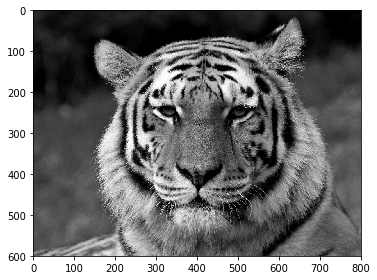

In [86]:
imshow(imgN)

### 1.2 Устойчивый автоконтраст черно-белого изображения

In [87]:
img = imread('tiger-low-contrast.png')
img=img.astype('float')
k=int(img.shape[0]*img.shape[1]*0.05)

In [88]:
img_copy=img.copy()
img_copy=img_copy.ravel()
img_copy.sort()

In [89]:
Xmin=img_copy[k]
Xmax=img_copy[len(img_copy)-k]
print(Xmin,Xmax)

129.0 208.0


In [90]:
imgN=(img-Xmin)*255/(Xmax-Xmin)

In [91]:
img_out=np.clip(imgN,0,255).astype('uint8')

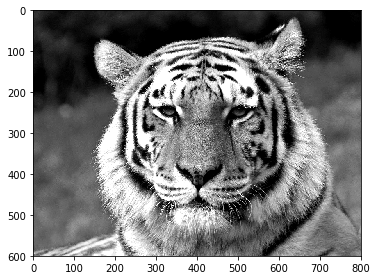

In [92]:
imshow(img_out)

In [93]:
img_sample = imread('tiger-stable-contrast.png')
np.array_equal(img_out,img_sample)

True

### 1.3. Устойчивый цветной автоконтраст

In [94]:
img = imread('tiger-color.png')
img=img.astype('float')
r = img[:,:,0]
g = img[:,:,1]
b = img[:,:,2]

C:\Users\DSycheva\Anacondaa\lib\site-packages\skimage\io\_io.py:140: UserWarning: out2_img.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\DSycheva\Anacondaa\lib\site-packages\skimage\util\dtype.py:179: UserWarning: Downcasting uint32 to uint8 without scaling because max value 255 fits in uint8
  "value {} fits in {}".format(a.dtype, dtype, a.max(), dtype))
C:\Users\DSycheva\Anacondaa\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


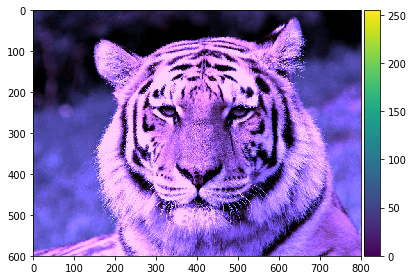

In [102]:
y = 0.2126*r+0.7152*g+0.0722*b
u = -0.0999*r-0.0336*g+0.436*b
v = 0.615*r-0.5586*g-0.0563*b
k = round(img.shape[0]*img.shape[1]*0.05)
y_sort = y.copy()
y_sort = y_sort.ravel()
y_sort.sort()
x_min = y_sort[k]
x_max = y_sort[y.shape[0]*y.shape[1]-k]
y = (y-x_min)*255/(x_max-x_min)
y = clip(y,0,255)
r = y + 1.2803*v
g = y - 0.2148*u - 0.3805*v
b = y + 2.1279*u
img_N = dstack((r,g,b))
img_N = clip(img_N,0,255)
img_N = img_N.astype('uint')
imsave ('out2_img.png', img_N)
imshow(img_N)